## Logistic Regression (optional advanced lab)

Logistic regression models $P(y|\boldsymbol{x})$ directly by assuming it is a (logistic) function of a linear combination of the features. The logistic function $\theta(s) = \frac{e^s}{e^s+1}$ maps the weighted features to $[0,1]$ to allow it to model a probability. Training logistic regression corresponds to learning the weights $\boldsymbol{w}$ to maximise the likelihood function:

\begin{equation}
P(y_1...y_n|\boldsymbol{x}_1...\boldsymbol{x}_n,\boldsymbol{w}) = \prod_{i=1}^n \theta(y_i\boldsymbol{w}^T\boldsymbol{x}_i)
\end{equation}

Maximising the likelihood $P(y_1...y_n|\boldsymbol{x}_1...\boldsymbol{x}_n,\boldsymbol{w})$ is equivalent to minimising the negative log-likelihood: 
\begin{equation}
\boldsymbol{w}^* = argmin_{\boldsymbol{w}}\left( -\log\left(\prod_{i=1}^n \theta(y_i\boldsymbol{w}^T\boldsymbol{x}_i)\right)\right)
= argmin_{\boldsymbol{w}}\left( \sum_{i=1}^n \ln(1+e^{-y_i\boldsymbol{w}^T\boldsymbol{x}_i})\right)
\end{equation}

Once we have the weights $\boldsymbol{w}^*$, we can predict the probability that a new observation belongs to each class.

In [1]:
%pylab inline
%load_ext autoreload
%autoreload
import numpy as np
import matplotlib.pyplot as pl
import util

from scipy.stats import itemfreq
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal as mvnorm

import sklearn
import scipy
import matplotlib
print("SKLEARN",sklearn.__version__)
print ("SCIPY",scipy.version.full_version)
print("NUMPY",np.__version__)
print("MATPLOTLIB",matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
('version', 1)
('SKLEARN', '0.17.1')
('SCIPY', '0.18.1')
('NUMPY', '1.11.2')
('MATPLOTLIB', '1.5.3')


*Exercise: Use Sklearn to fit a logistic regression model on the gaussian mixture data.*

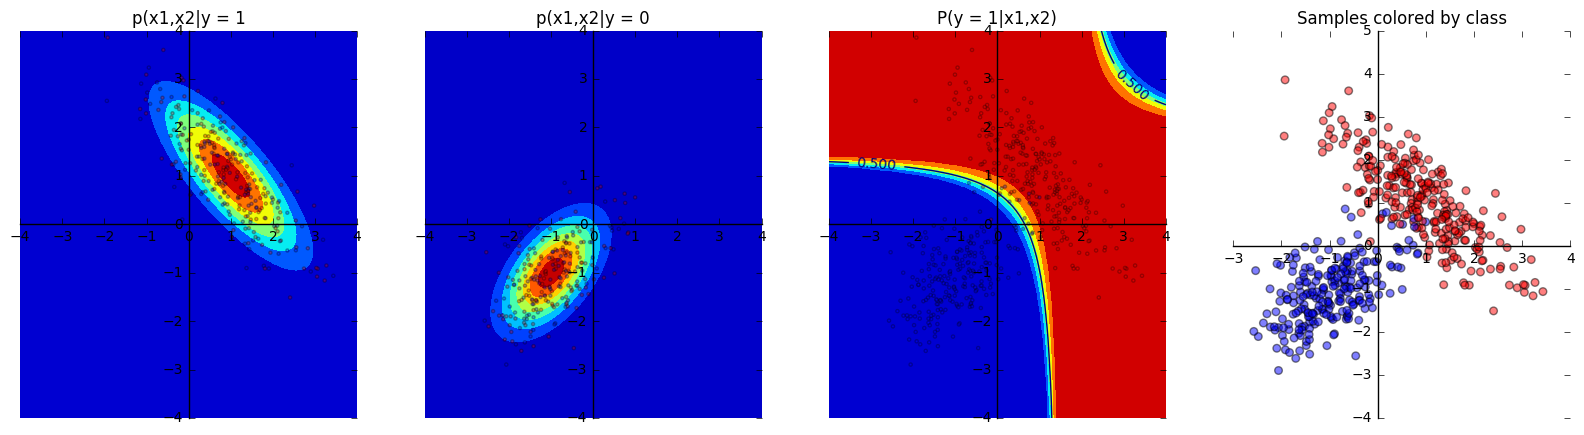

In [2]:
# Generates some data from a Gaussian Mixture Model. 
mean0 = [-1,-1]  # the mean of the gaussian for class 0      
mean1 = [1,1] # the mean of the gaussian for class 1
cov0 = [[.5, .28], [.28, .5]] # the covariance matrix for class 0
cov1 = [[1, -.8], [-.8, 1]] # the covariance matrix for class 1
mixture = util.GaussianMixture(mean0,cov0,mean1,cov1)
mX,mY = mixture.sample(500,0.5,plot=True)

In [3]:
#Run Logistic regression on the gaussian mixture data
from sklearn.linear_model import LogisticRegression

logistic = YOUR CODE HERE # create and fit a logistic regression model on mX,mY

# print out the intercept and coefficients, w
YOUR CODE HERE



SyntaxError: invalid syntax (<ipython-input-3-aca5ac9a0b48>, line 4)

In [ ]:
# plot the probability y = 1 as over the feature space as for Naive Bayes
logistz = logistic.predict_proba(test_points)[:,1].reshape(len(x),len(y)) # probability Y = 1
f,ax = subplots(1,1,figsize=(5,5))
cn = ax.contourf(x,y,logistz)
ct = ax.contour(cn,levels=[0.5])
ax.scatter(mX[:,0],mX[:,1],s=5, c = ["black" if t < 1 else "white" for t in mY],alpha=1)
ax.clabel(ct)
show()# implement the jacobian

In [ ]:
# we can model more complex decision boundaries by expanding the feature space to include combinations of features

# re-fit logistic regression adding in all quadratic combinations of features ie x1,x2,x1x2,x1^2,x2^2
from sklearn.preprocessing import PolynomialFeatures
poly_expand = YOUR CODE HERE # create a polynomial feature transformer that produces quadratic combinations
m2X = YOUR CODE HERE # use poly_expand to transform the original features (mX)
logistic.YOUR CODE HERE # fit the logistic model with the new features

# transform the test plots and predict and plot
testpoints2 = poly_expand.transform(test_points)
logistic2z = logistic.predict_proba(testpoints2)[:,1].reshape(len(x),len(y)) # probability Y = 1
f,ax = subplots(1,1,figsize=(5,5))
cn = ax.contourf(x,y,logistic2z)
ct = ax.contour(cn,levels=[0.5])
ax.scatter(mX[:,0],mX[:,1],s=5, c = ["black" if t < 1 else "white" for t in mY],alpha=1)
ax.clabel(ct)
show()

With large numbers of features there is a risk of over fitting to the training data. We can tune a logistic regression model to reduce the risk of over fitting by penalising large weights, $\boldsymbol{w}$ 

*Exersise: Experiment with the regularisation parameters sklearn provides: 
penalty = "l1" or "l2" and C = inverse of weight of regularisation term *

In [ ]:
lreg = YOUR CODE HERE # create and fit a logistic regression model to the quadraticly expanded features


# plots the probability as before
logistic2z_reg = lreg.predict_proba(testpoints2)[:,1].reshape(len(x),len(y)) # probability Y = 1
f,ax = subplots(1,1,figsize=(5,5))
cn = ax.contourf(x,y,logistic2z_reg)
ct = ax.contour(cn,levels=[0.5])
ax.scatter(mX[:,0],mX[:,1],s=5, c = ["black" if t < 1 else "white" for t in mY],alpha=1)
ax.clabel(ct)
show()